In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

%matplotlib inline

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)




Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s -

In [4]:
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
maxlen = 100
training_samples = 8000
validation_samples = 10000
max_words = 10000

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [7]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [8]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [9]:
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [10]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [13]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s - loss: 0.6913 - acc: 0.5993 - val_loss: 0.6288 - val_acc: 0.6487
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.5577 - acc: 0.7184 - val_loss: 0.5990 - val_acc: 0.6734
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.4720 - acc: 0.7829 - val_loss: 0.6006 - val_acc: 0.6815
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.4099 - acc: 0.8123 - val_loss: 0.6119 - val_acc: 0.6963
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.3460 - acc: 0.8499 - val_loss: 0.6901 - val_acc: 0.6720
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.2852 - acc: 0.8809 - val_loss: 0.7020 - val_acc: 0.6835
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.2364 - acc: 0.9058 - val_loss: 1.0992 - val_acc: 0.6313
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.1980 - 

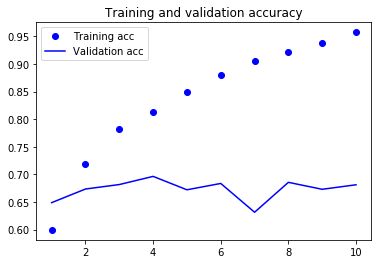

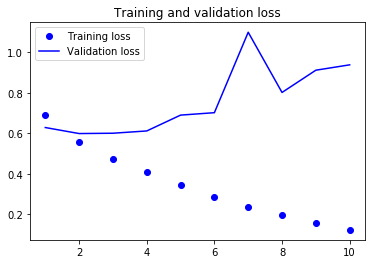

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [15]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s - loss: 0.5390 - acc: 0.7134 - val_loss: 0.4064 - val_acc: 0.8169
Epoch 2/10
8000/8000 [==============================] - 2s - loss: 0.1443 - acc: 0.9522 - val_loss: 0.4170 - val_acc: 0.8242
Epoch 3/10
8000/8000 [==============================] - 2s - loss: 0.0103 - acc: 0.9984 - val_loss: 0.5469 - val_acc: 0.8204
Epoch 4/10
8000/8000 [==============================] - 2s - loss: 8.4959e-04 - acc: 0.9999 - val_loss: 0.6852 - val_acc: 0.8210
Epoch 5/10
8000/8000 [==============================] - 2s - loss: 1.1458e-05 - acc: 1.0000 - val_loss: 0.8256 - val_acc: 0.8242
Epoch 6/10
8000/8000 [==============================] - 2s - loss: 1.3391e-06 - acc: 1.0000 - val_loss: 0.9083 - val_acc: 0.8249
Epoch 7/10
8000/8000 [==============================] - 2s - loss: 1.1349e-07 - acc: 1.0000 - val_loss: 0.9762 - val_acc: 0.8212
Epoch 8/10
8000/8000 [==============================] - 2s -

In [17]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [18]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

24352/25000 [============================>.] - ETA: 0s

[0.9265196016025543, 0.68364]